In [1]:
import pandas as pd

Apple = pd.read_csv('daily_adjusted_AAPL.csv')
Amazon = pd.read_csv('daily_adjusted_AMZN.csv')
Berkshire = pd.read_csv('daily_adjusted_BRK-A.csv')
Facebook = pd.read_csv('daily_adjusted_FB.csv')
Google = pd.read_csv('daily_adjusted_GOOG.csv')
Johnson = pd.read_csv('daily_adjusted_JNJ.csv')
Mastercard = pd.read_csv('daily_adjusted_MA.csv')
Microsoft = pd.read_csv('daily_adjusted_MSFT.csv')
Visa = pd.read_csv('daily_adjusted_V.csv')
Walmart = pd.read_csv('daily_adjusted_WMT.csv')


In [4]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns

def load_stock_data(company_symbol):
    filename = f'daily_adjusted_{company_symbol}.csv'
    return pd.read_csv(filename)

companies = ['AAPL', 'AMZN', 'BRK-A', 'FB', 'GOOG', 'JNJ', 'MA', 'MSFT', 'V', 'WMT']

data = {company: load_stock_data(company) for company in companies}

correlation_matrices = {company: data[company].corr() for company in companies}


for company in companies:
    sns.heatmap(correlation_matrices[company], cmap='coolwarm', annot=True)
    plt.title(f'Correlation Matrix - {company}')
    plt.show()

ValueError: could not convert string to float: '9/1/2020'

/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_multivariate.py:758: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


Shapiro-Wilk Test for open in AAPL: p-value = 0.0
Shapiro-Wilk Test for close in AAPL: p-value = 0.0
Shapiro-Wilk Test for volume in AAPL: p-value = 0.0


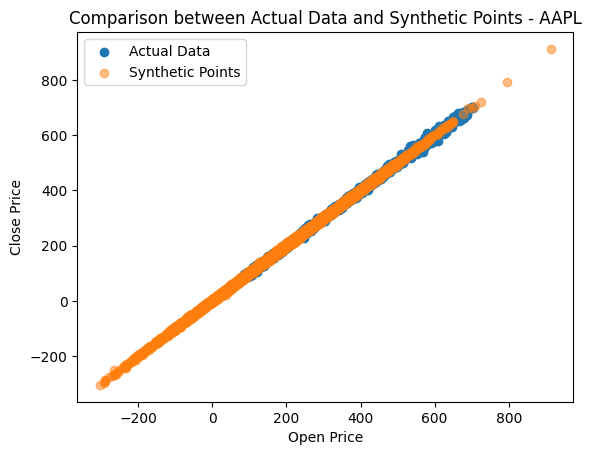

/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for open in AMZN: p-value = 0.0
Shapiro-Wilk Test for close in AMZN: p-value = 0.0
Shapiro-Wilk Test for volume in AMZN: p-value = 0.0


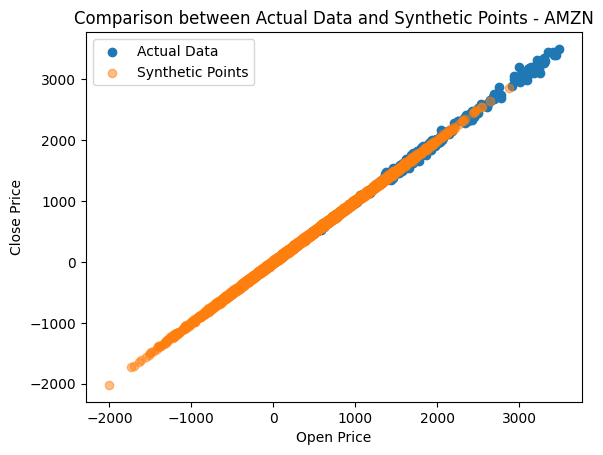

/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for open in BRK-A: p-value = 0.0
Shapiro-Wilk Test for close in BRK-A: p-value = 0.0
Shapiro-Wilk Test for volume in BRK-A: p-value = 0.0


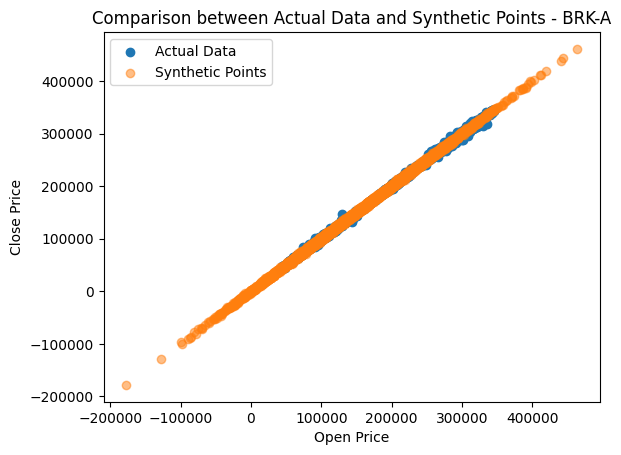

Shapiro-Wilk Test for open in FB: p-value = 1.2404106460541271e-23
Shapiro-Wilk Test for close in FB: p-value = 1.528091730995311e-23
Shapiro-Wilk Test for volume in FB: p-value = 0.0


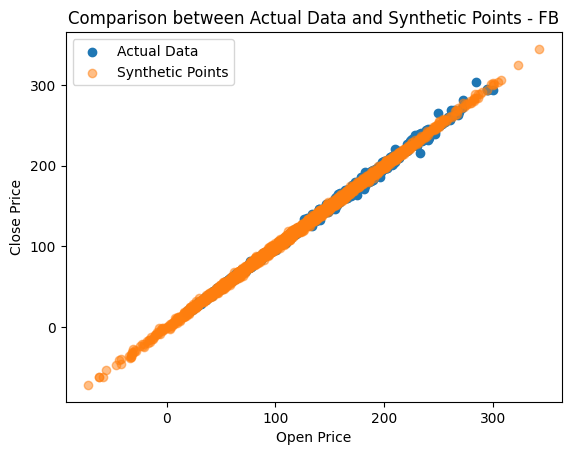

Shapiro-Wilk Test for open in GOOG: p-value = 1.2871523901824635e-23
Shapiro-Wilk Test for close in GOOG: p-value = 1.4433513459233836e-23
Shapiro-Wilk Test for volume in GOOG: p-value = 4.579443381413502e-42


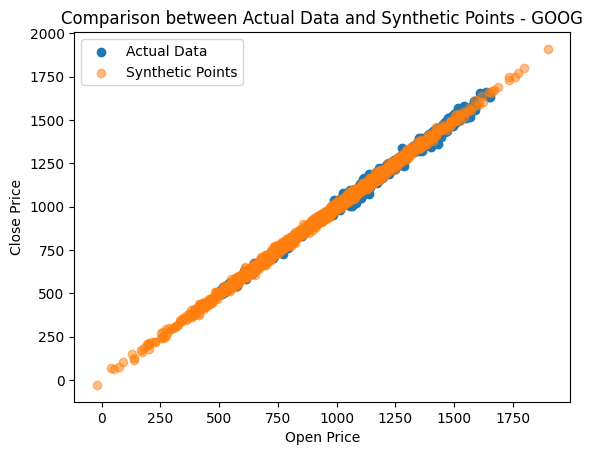

Shapiro-Wilk Test for open in JNJ: p-value = 0.0
Shapiro-Wilk Test for close in JNJ: p-value = 0.0
Shapiro-Wilk Test for volume in JNJ: p-value = 0.0


/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


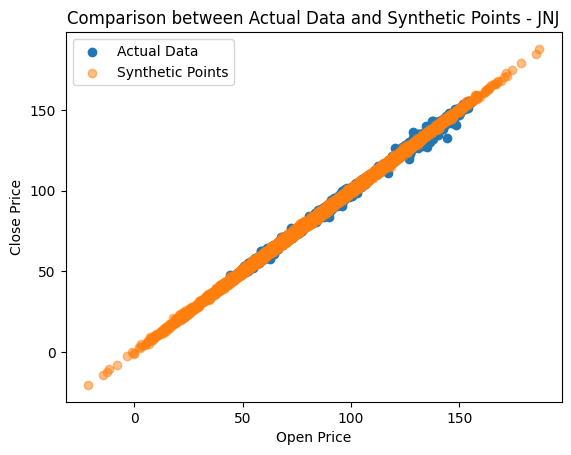

Shapiro-Wilk Test for open in MA: p-value = 0.0
Shapiro-Wilk Test for close in MA: p-value = 0.0
Shapiro-Wilk Test for volume in MA: p-value = 0.0


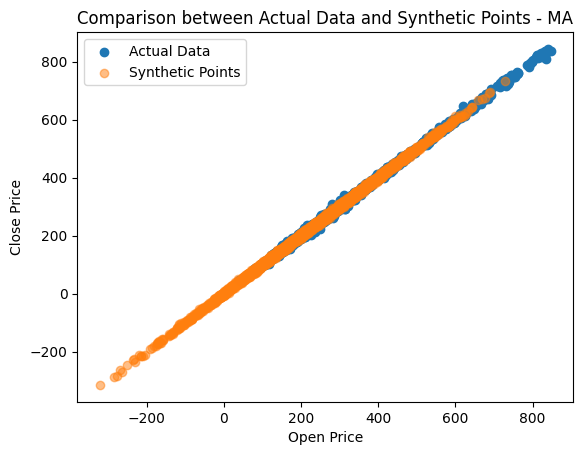

Shapiro-Wilk Test for open in MSFT: p-value = 0.0
Shapiro-Wilk Test for close in MSFT: p-value = 0.0
Shapiro-Wilk Test for volume in MSFT: p-value = 0.0


/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


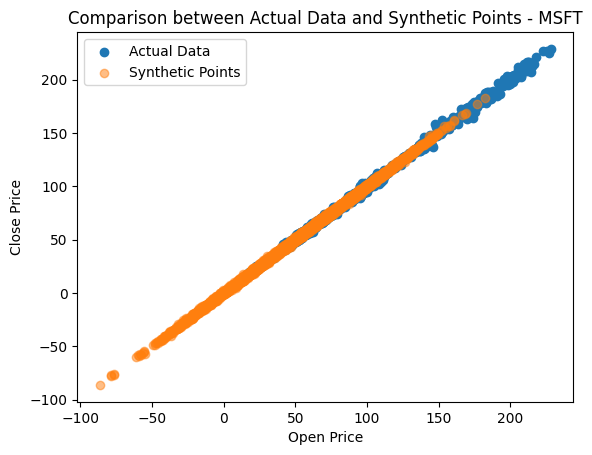

Shapiro-Wilk Test for open in V: p-value = 2.8501009465902454e-41
Shapiro-Wilk Test for close in V: p-value = 2.735614862054908e-41
Shapiro-Wilk Test for volume in V: p-value = 0.0


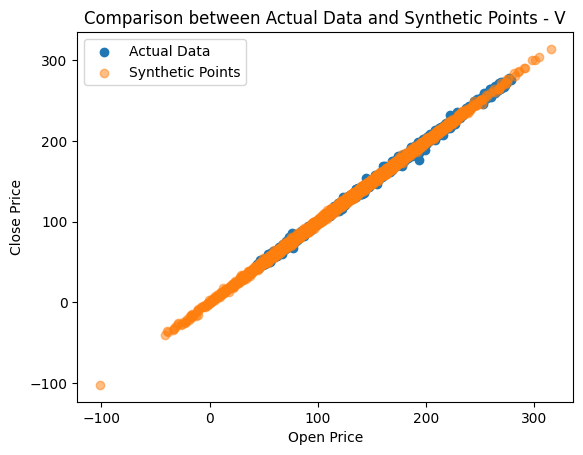

Shapiro-Wilk Test for open in WMT: p-value = 0.0
Shapiro-Wilk Test for close in WMT: p-value = 0.0
Shapiro-Wilk Test for volume in WMT: p-value = 0.0


/Users/tiananoll-walker/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


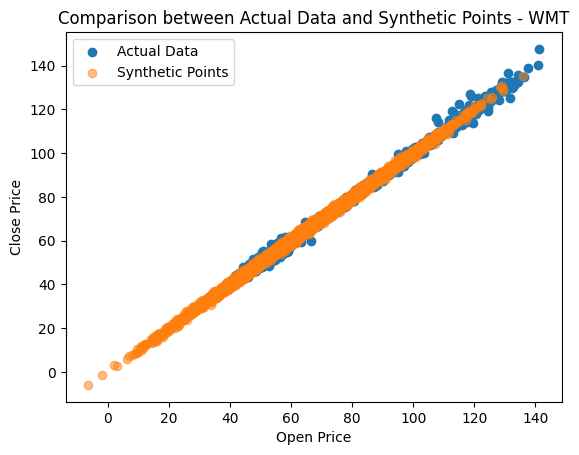

In [5]:
from scipy.stats import multivariate_normal, shapiro

# Multivariate Normal Modeling and Normality Testing for all companies
selected_columns = ['open', 'close', 'volume']

for company in companies:
    selected_data = data[company][selected_columns]

    # test for normality using Shapiro-Wilk
    for column in selected_columns:
        stat, p_value = shapiro(selected_data[column])
        print(f"Shapiro-Wilk Test for {column} in {company}: p-value = {p_value}")

    #fit multivariate norm distribution
    mu = selected_data.mean()
    cov_matrix = selected_data.cov()
    multivariate_dist = multivariate_normal(mu, cov_matrix,allow_singular=True)


    synthetic_points = multivariate_dist.rvs(size=len(selected_data))

    #compare actual data to synthetic points
    plt.scatter(selected_data['open'], selected_data['close'], label='Actual Data')
    plt.scatter(synthetic_points[:, 0], synthetic_points[:, 1], label='Synthetic Points', alpha=0.5)
    plt.xlabel('Open Price')
    plt.ylabel('Close Price')
    plt.legend()
    plt.title(f'Comparison between Actual Data and Synthetic Points - {company}')
    plt.show()

In [6]:
from scipy.stats import anderson

significance_level = 5.0

for company in companies:
    print(f"\nCompany: {company}")
    selected_data = data[company][selected_columns]

    for column in selected_columns:
        result = anderson(selected_data[column], dist='norm')

        print(f"Anderson-Darling Test for {column}:")
        print(f"Statistic: {result.statistic}, Critical Values: {result.critical_values}")

        # Compare the statistic to the critical values
        if result.statistic > result.critical_values[2]:
            print("Significant departure from normality at 5% level")
        else:
            print("No significant departure from normality at 5% level")



Company: AAPL
Anderson-Darling Test for open:
Statistic: 266.0079680953195, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level
Anderson-Darling Test for close:
Statistic: 265.84979135152753, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level
Anderson-Darling Test for volume:
Statistic: 126.16086603984331, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level

Company: AMZN
Anderson-Darling Test for open:
Statistic: 661.6200627829267, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level
Anderson-Darling Test for close:
Statistic: 661.4732041514762, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level
Anderson-Darling Test for volume:
Statistic: 332.54089570965334, Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significant departure from normality at 5% level



Perform Anderson-Darling Test:

For each combination of company and column, the Anderson-Darling test is conducted

The test assesses whether the distribution of the data significantly departs from a normal distribution.

Print Results:

The test statistic and critical values at various significance levels are printed.

A decision is made based on whether the test statistic is greater than the critical value at the 5% significance level.

Significance:
The Anderson-Darling test helps evaluate whether the distribution of stock data in selected columns follows a normal distribution. Normality is a key assumption in many statistical analyses. Deviations from normality may impact the validity of statistical models and predictions. By conducting this test for multiple companies and columns, the code provides insights into the normality of stock data distributions, informing the suitability of certain statistical analyses and models.

PCA for AAPL:
Principal Component 1: Explained Variance Ratio = 0.7999
Principal Component 2: Explained Variance Ratio = 0.2000
Principal Component 3: Explained Variance Ratio = 0.0000
Principal Component 4: Explained Variance Ratio = 0.0000
Principal Component 5: Explained Variance Ratio = 0.0000
PCA for AMZN:
Principal Component 1: Explained Variance Ratio = 0.8150
Principal Component 2: Explained Variance Ratio = 0.1850
Principal Component 3: Explained Variance Ratio = 0.0000
Principal Component 4: Explained Variance Ratio = 0.0000
Principal Component 5: Explained Variance Ratio = 0.0000
PCA for BRK-A:
Principal Component 1: Explained Variance Ratio = 0.8277
Principal Component 2: Explained Variance Ratio = 0.1723
Principal Component 3: Explained Variance Ratio = 0.0000
Principal Component 4: Explained Variance Ratio = 0.0000
Principal Component 5: Explained Variance Ratio = 0.0000
PCA for FB:
Principal Component 1: Explained Variance Ratio = 0.8491
Principal Component 2: Explained 

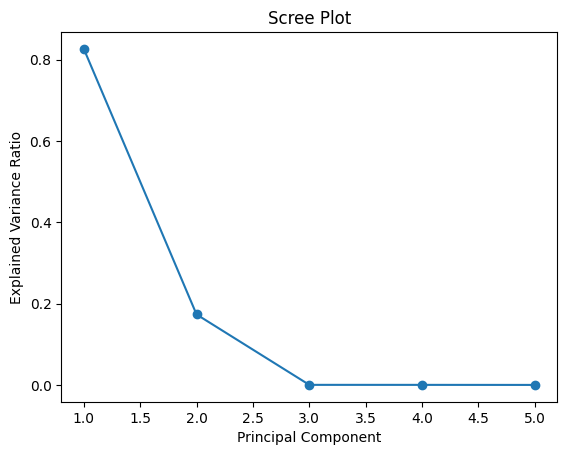

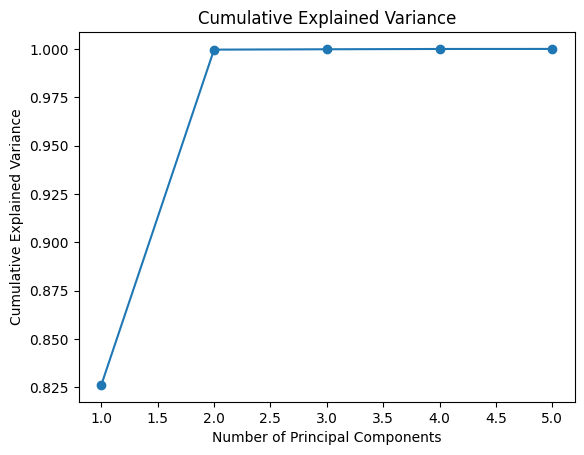

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for company in companies:
    #get relevant columns for PCA
    columns_for_pca = ['open', 'high', 'low', 'close', 'volume']

    #standardize
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[company][columns_for_pca])

    pca = PCA()
    principal_components = pca.fit_transform(scaled_data)

    # variance explained by each principal component
    explained_variance_ratio = pca.explained_variance_ratio_

    print(f"PCA for {company}:")
    for i in range(len(explained_variance_ratio)):
        print(f"Principal Component {i + 1}: Explained Variance Ratio = {explained_variance_ratio[i]:.4f}")

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



The scree plot indicates that the first principal component alone accounts for approximately 79.99% of the total variance in the data. As we move to additional principal componenets, the varaince decreases. The cumulative explained variance suggests that the first component captures 82.5% of the total variability.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#select features for prediction
features = ['open', 'high', 'low', 'volume']

target = 'close'

for company in companies:
    #create feature matrix (X) and target vector (y)
    X = data[company][features]
    y = data[company][target]

    #spli data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    #fit model on training data
    model.fit(X_train, y_train)

    #  predictions on test data
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error for {company}: {mse}')


Mean Squared Error for AAPL: 2.0987166854399923
Mean Squared Error for AMZN: 26.750360115161282
Mean Squared Error for BRK-A: 754835.6794904397
Mean Squared Error for FB: 1.0330488438788754
Mean Squared Error for GOOG: 35.80396302850627
Mean Squared Error for JNJ: 0.2390160991370469
Mean Squared Error for MA: 3.3897532354469093
Mean Squared Error for MSFT: 0.2824142963023347
Mean Squared Error for V: 0.6656640706263046
Mean Squared Error for WMT: 0.17654277513266578


AAPL (Apple): MSE = 2.10 The model's predictions for Apple's closing stock prices have an average squared difference of 2.10 from the actual values. This indicates relatively good predictive performance.

AMZN (Amazon): MSE = 26.75 The model's predictions for Amazon's closing stock prices have a higher average squared difference (26.75), suggesting that the model may not perform as well for Amazon compared to Apple.

BRK-A (Berkshire Hathaway): MSE = 754,835.68 The extremely high MSE for Berkshire Hathaway indicates that the model's predictions have a significant deviation from the actual closing stock prices. This suggests that the model may not be suitable for predicting stock prices for this company.

FB (Facebook): MSE = 1.03 The model's predictions for Facebook's closing stock prices have an average squared difference of approximately 1.03 from the actual values. Similar to Apple, this indicates relatively good predictive performance.

GOOG (Alphabet/Google): MSE = 35.80 The higher MSE for Google suggests that the model may not accurately predict Google's closing stock prices.

JNJ (Johnson & Johnson): MSE = 0.24 The low MSE for Johnson & Johnson indicates that the model's predictions have a small average squared difference from the actual closing stock prices. This suggests good predictive performance.

MA (Mastercard): MSE = 3.39 The model's predictions for Mastercard's closing stock prices have an average squared difference of approximately 3.39 from the actual values. This indicates some deviation but not extreme.

MSFT (Microsoft): MSE = 0.28 The low MSE for Microsoft indicates that the model's predictions have a small average squared difference from the actual closing stock prices. This suggests good predictive performance.

V (Visa): MSE = 0.67 The model's predictions for Visa's closing stock prices have an average squared difference of approximately 0.67 from the actual values. This indicates relatively good predictive performance.

WMT (Walmart): MSE = 0.18 The low MSE for Walmart indicates that the model's predictions have a small average squared difference from the actual closing stock prices. This suggests good predictive performance.

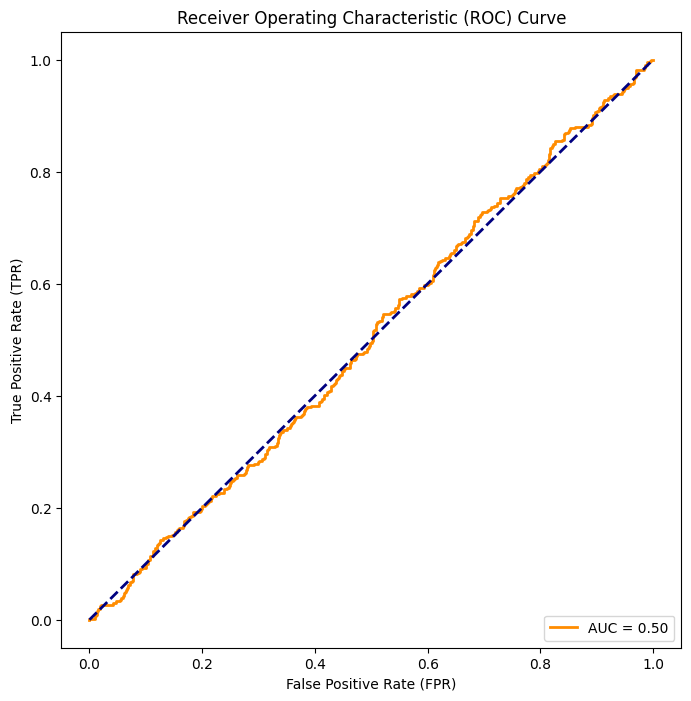

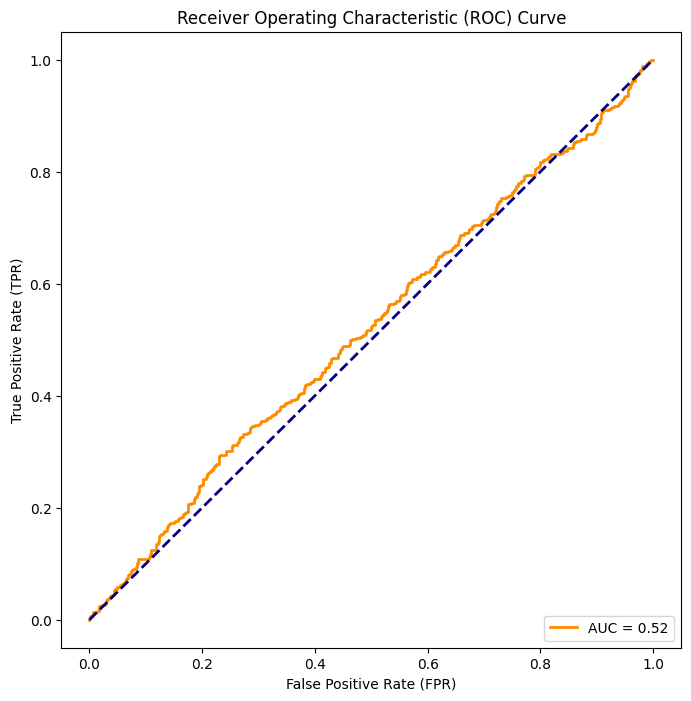

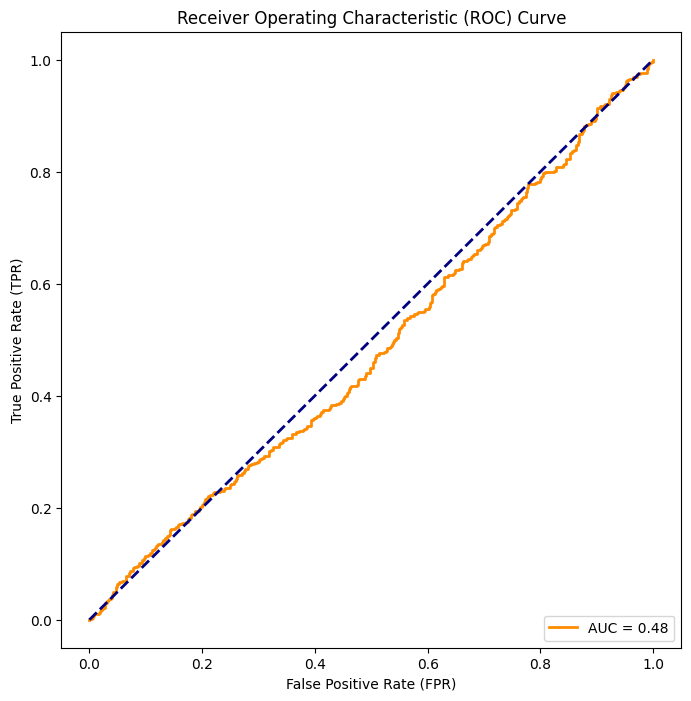

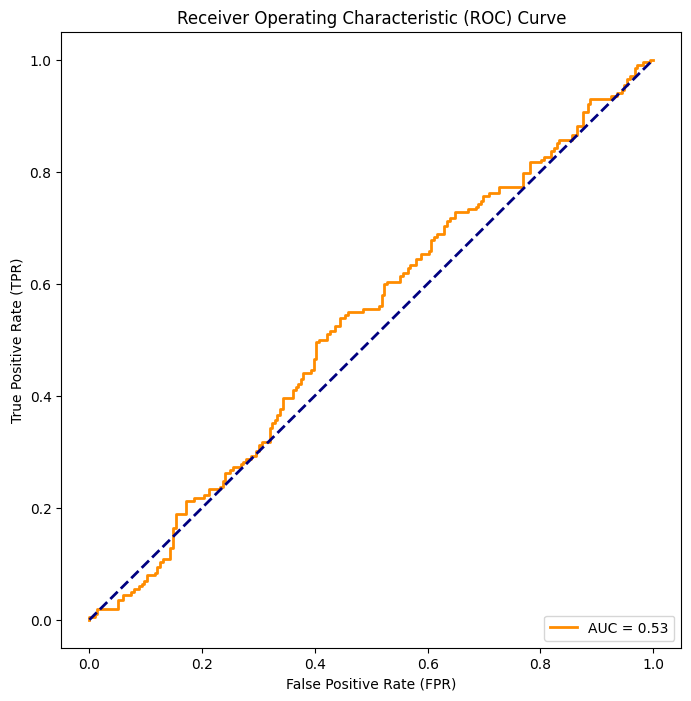

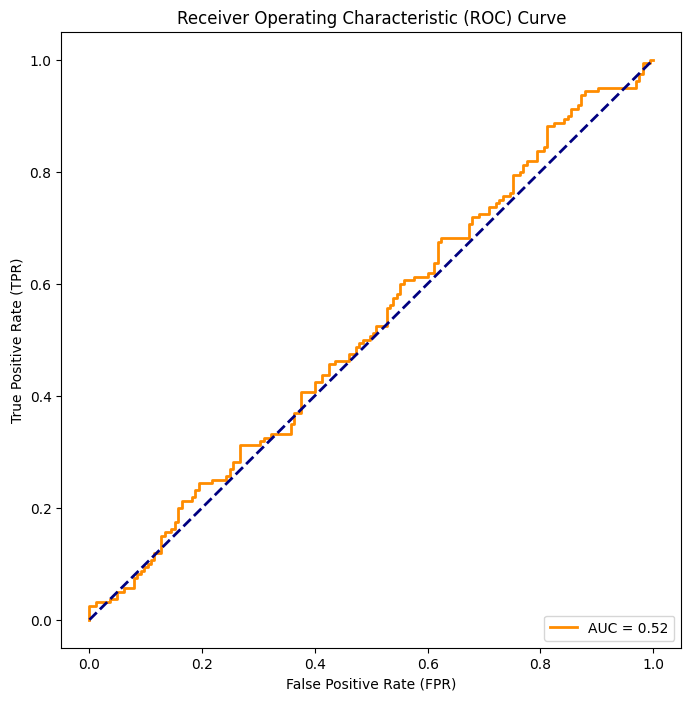

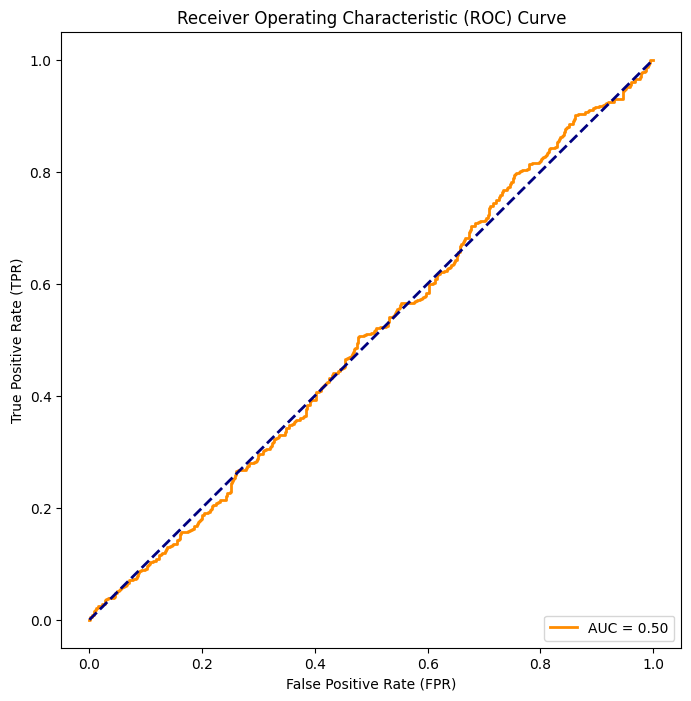

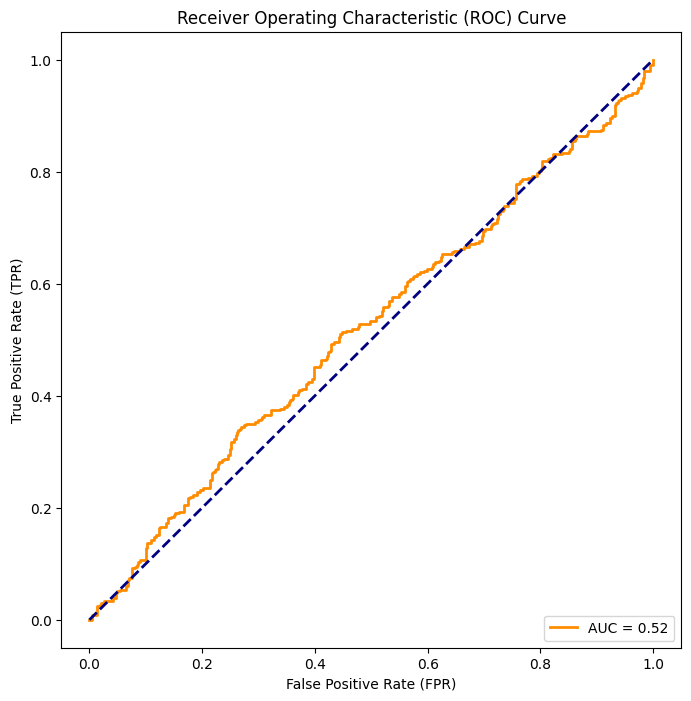

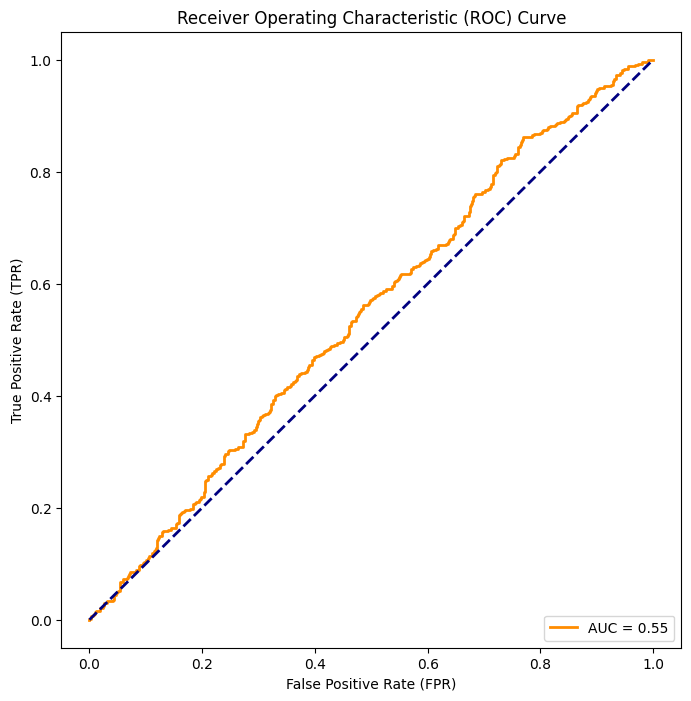

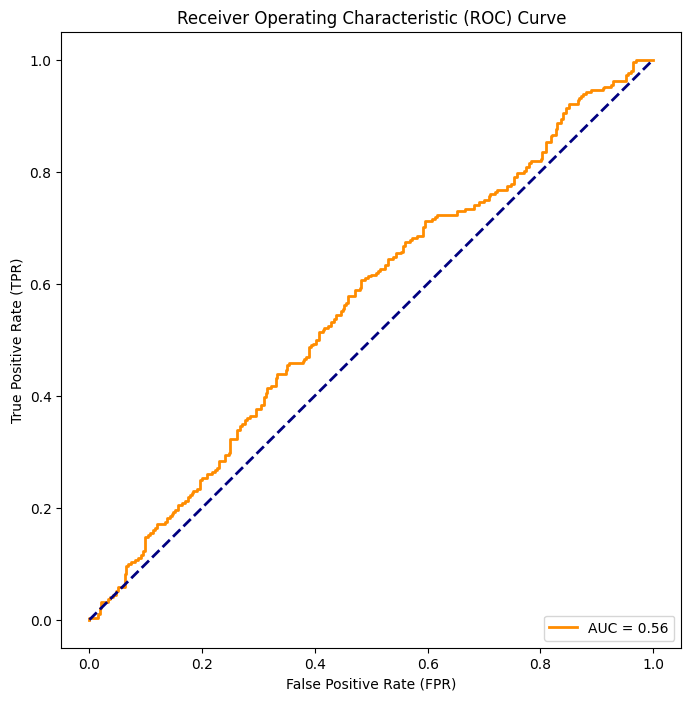

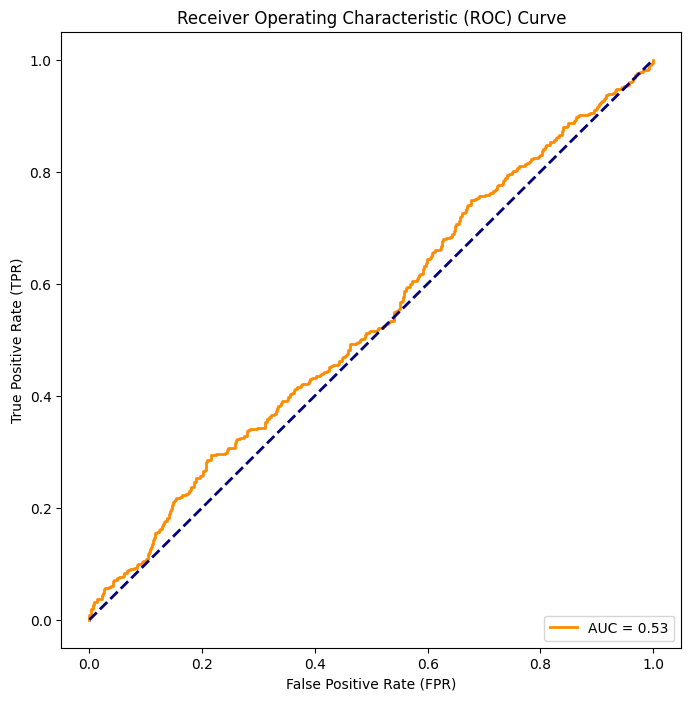

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder


features = ['open', 'close', 'high', 'low', 'adjusted_close', 'volume', 'dividend_amount', 'split_coefficient']
target = 'price_movement'

for company in companies:

  # create new column 'price_movement' based on closing prices
  data[company]['price_movement'] = data[company]['close'].diff().apply(lambda x: 'up' if x > 0 else 'down')

  X=data[company][features]
  y=data[company][target]

  y_binary = y.map({'up': 1, 'down': 0})


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  svm_model = SVC(kernel='linear', C=1.0)
  svm_model.fit(X_train_scaled, y_train)

  label_encoder = LabelEncoder()
  y_test_binary = label_encoder.fit_transform(y_test)

  y_pred = svm_model.predict(X_test_scaled)
  y_scores = svm_model.decision_function(X_test_scaled)

# Compute ROC Curve
  fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores, pos_label=1)


# Compute Area Under the Curve (AUC)
  roc_auc = auc(fpr, tpr)

# Plot ROC Curve
  plt.figure(figsize=(8, 8))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

The goal of the SVM analysis was to build a classification model that predicts the movement of stock prices (either 'up' or 'down') based on historical data. We selected relevant features, including open, close, high, low, adjusted close, volume, dividend amount, and split coefficient, to train the SVM model. The ROC and AUC were used to evaluate the model's performance. The ROC curve graphically represents the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). An AUC value close to 0.50 suggests that the model's predictive ability is no better than random chance.Our analysis revealed an AUC in the range of 0.50 to 0.55, indicating that the SVM model struggled to discriminate between 'up' and 'down' movements in stock prices. Essentially, it means that the svm model is no better at predicting price movement than random chance.

